In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
dt = datetime(2025,11,12,13,4,10)
dt

datetime.datetime(2025, 11, 12, 13, 4, 10)

In [3]:
print(dt.year,dt.month, dt.day, dt.hour, dt.minute, dt.second)

2025 11 12 13 4 10


https://docs.python.org/ko/3.13/library/datetime.html#strftime-and-strptime-behavior

In [4]:
dt.strftime('%Y년%m월%d일 %H시%M분%S초 %A')

'2025년11월12일 13시04분10초 Wednesday'

In [5]:
datetime.now()

datetime.datetime(2025, 12, 4, 11, 22, 37, 628807)

### 시계열 데이터의 정의
- 인덱스가 datetime 형
- 시계열 데이터의 indexing, slicing 사용
- 통계 분석 --> 집계, resample 함수 사용 가능

In [6]:
data1 = [[1,2],[3,4],[5,8],[7,6],[9,12],[11,10],[13,16],[15,20]]
df = pd.DataFrame( data1 )
df.index=['2019-01-01','2019-02-01','2019-03-01','2019-04-01',
          '2019-05-01','2019-06-01','2019-07-01','2019-08-01']
# df.index=[datetime(2019,1,1),datetime(2019,2,1),datetime(2019,3,1),
#           datetime(2019,4,1),datetime(2019,5,1),datetime(2019,6,1),
#           datetime(2019,7,1),datetime(2019,8,1) ]
df

,0,1
2019-01-01,1,2
2019-02-01,3,4
2019-03-01,5,8
2019-04-01,7,6
2019-05-01,9,12
2019-06-01,11,10
2019-07-01,13,16
2019-08-01,15,20


In [7]:
df.index

Index(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
       '2019-06-01', '2019-07-01', '2019-08-01'],
      dtype='object')

In [8]:
#2019-01-01, 2019/01/01, 2019.01.01 : datetime 변환 가능

In [9]:
df.index=['2019년01월01일','2019년02월01일','2019년03월01일','2019년04월01일',
          '2019년05월01일','2019년06월01일','2019년07월01일','2019년08월01일'] #포멧이 안 맞는경우 맞춰져야함

In [10]:
df.index = pd.to_datetime(df.index, format='%Y년%m월%d일')

In [11]:
df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq=None)

In [12]:
df.index = pd.to_datetime(df.index) #날짜 타입으로 해당 인덱스를 변환

In [13]:
df.columns = ['A','B']

### 이동 평균(추세), 지수이동 평균

In [14]:
df.rolling( window=2 ).mean()

,A,B
2019-01-01,NaN,NaN
2019-02-01,2.0,3.0
2019-03-01,4.0,6.0
2019-04-01,6.0,7.0
2019-05-01,8.0,9.0
2019-06-01,10.0,11.0
2019-07-01,12.0,13.0
2019-08-01,14.0,18.0


In [15]:
df.rolling( window=3 ).mean()

,A,B
2019-01-01,NaN,NaN
2019-02-01,NaN,NaN
2019-03-01,3.0,4.666667
2019-04-01,5.0,6.000000
2019-05-01,7.0,8.666667
2019-06-01,9.0,9.333333
2019-07-01,11.0,12.666667
2019-08-01,13.0,15.333333


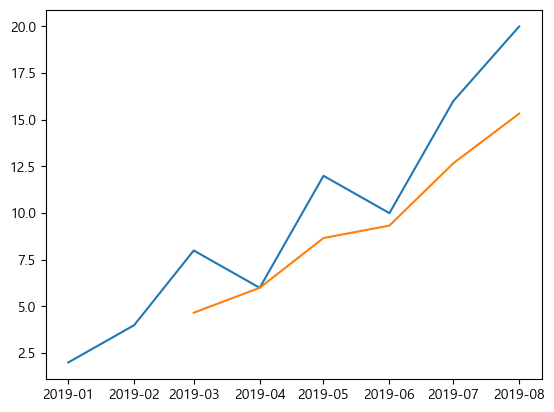

In [16]:
plt.plot(df.index, df['B'])
plt.plot(df.index, df['B'].rolling(window=3).mean())
plt.show()

In [17]:
df

,A,B
2019-01-01,1,2
2019-02-01,3,4
2019-03-01,5,8
2019-04-01,7,6
2019-05-01,9,12
2019-06-01,11,10
2019-07-01,13,16
2019-08-01,15,20


https://financedata.github.io/posts/finance-data-reader-users-guide.html

In [18]:
%pip install -U finance-datareader

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import FinanceDataReader as fdr

# 신라젠, 2018년
df = fdr.DataReader('005930', '2017')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998
...,...,...,...,...,...,...
2025-11-28,103800,103800,100500,100500,15292277,-0.028986
2025-12-01,102000,102800,99900,100800,10905526,0.002985
2025-12-02,101200,103500,101000,103400,13649487,0.025794


In [20]:
df.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2025-11-21', '2025-11-24', '2025-11-25', '2025-11-26',
               '2025-11-27', '2025-11-28', '2025-12-01', '2025-12-02',
               '2025-12-03', '2025-12-04'],
              dtype='datetime64[ns]', name='Date', length=2189, freq=None)

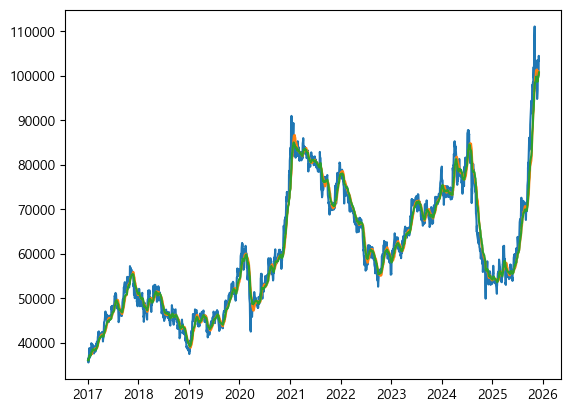

In [21]:
plt.plot(df.index, df['Close'])
plt.plot(df.index, df['Close'].rolling(window=20).mean())
plt.plot(df.index, df['Close'].ewm(span=20).mean())
plt.show()

### 시계열 전용 인덱싱 슬라이싱

In [22]:
df.loc['2019'] #datetime은 2019만 적어도 2019년 다 가져옴

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989
2019-01-07,38000,38900,37800,38750,12748997,0.034713
2019-01-08,38000,39200,37950,38100,12756554,-0.016774
...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929
2019-12-24,55600,55700,54800,55000,11868463,-0.009009
2019-12-26,54700,55400,54400,55400,9645034,0.007273


In [23]:
df.loc['2020-01']

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
2020-01-09,58400,58600,57400,58600,24102579,0.031690
2020-01-10,58800,59700,58300,59500,16000170,0.015358
2020-01-13,59600,60000,59100,60000,11359139,0.008403
2020-01-14,60400,61000,59900,60000,16906295,0.000000


In [24]:
df.loc['2020-07':'2020-09']

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-07-01,53400,53600,52400,52600,16706143,-0.003788
2020-07-02,52100,52900,52100,52900,14142583,0.005703
2020-07-03,53000,53600,52700,53600,11887868,0.013233
2020-07-06,54000,55000,53800,55000,19856623,0.026119
2020-07-07,55800,55900,53400,53400,30760032,-0.029091
...,...,...,...,...,...,...
2020-09-23,58400,58800,57400,58600,20111398,0.006873
2020-09-24,57700,58600,57600,57800,17564020,-0.013652
2020-09-25,57700,58200,57700,57900,11444683,0.001730


In [25]:
df.loc['2020-07-10':'2020-09-03']

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-07-10,53100,53200,52300,52700,13714746,-0.001894
2020-07-13,53300,53800,53100,53400,12240188,0.013283
2020-07-14,53700,53800,53200,53800,14269484,0.007491
2020-07-15,54400,55000,54300,54700,24051450,0.016729
2020-07-16,54800,54800,53800,53800,16779127,-0.016453
2020-07-17,54200,54700,54100,54400,10096174,0.011152
2020-07-20,54800,54800,54000,54200,10507530,-0.003676
2020-07-21,55200,55400,54800,55300,18297260,0.020295
2020-07-22,55300,55500,54700,54700,12885057,-0.010850


In [26]:
df.loc['2019':'2020']

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989
2019-01-07,38000,38900,37800,38750,12748997,0.034713
2019-01-08,38000,39200,37950,38100,12756554,-0.016774
...,...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326,0.022130
2020-12-24,74100,78800,74000,77800,32502870,0.052774
2020-12-28,79000,80100,78200,78700,40085044,0.011568


In [27]:
df['year'] = df.index.year #연도 추가

In [28]:
df['month'] = df.index.month

In [29]:
df.groupby('year')['Close'].mean()

year
2017    46414.897119
2018    46830.122951
2019    46583.333333
2020    57153.225806
2021    79155.645161
2022    63935.365854
2023    67457.142857
2024    71610.245902
2025    68530.222222
Name: Close, dtype: float64

In [30]:
df.groupby(df.index.year)['Close'].mean()

Date
2017    46414.897119
2018    46830.122951
2019    46583.333333
2020    57153.225806
2021    79155.645161
2022    63935.365854
2023    67457.142857
2024    71610.245902
2025    68530.222222
Name: Close, dtype: float64

In [32]:
df.groupby(df.index.month)['Close'].mean()

Date
1     59946.956522
2     59842.647059
3     59124.842105
4     60083.439153
5     59599.494382
6     60713.516484
7     61874.673367
8     60473.717277
9     61004.090909
10    61650.465116
11    63608.549223
12    61725.030303
Name: Close, dtype: float64

In [33]:
df.groupby([df.index.year, df.index.month]).mean()

Open           High            Low          Close  \
Date Date                                                               
2017 1      37340.000000   37825.950000   37079.000000   37486.000000   
     2      38577.900000   38911.950000   38275.900000   38571.000000   
     3      40889.954545   41447.272727   40740.863636   41166.363636   
     4      41909.950000   42261.000000   41549.000000   41959.000000   
     5      45590.526316   46040.000000   45188.421053   45550.526316   
...                  ...            ...            ...            ...   
2025 8      70810.000000   71300.000000   70065.000000   70470.000000   
     9      76677.272727   77595.454545   75900.000000   77022.727273   
     10     96533.333333   98066.666667   95427.777778   97111.111111   
     11    101370.000000  102820.000000   99315.000000  100700.000000   
     12    102950.000000  104075.000000  102025.000000  103025.000000   

                 Volume    Change    year  month  
Date Date                                         
2017 1     2.205060e+05  0.004693  2017.0    1.0  
     2     2.385224e+05 -0.001254  2017.0    2.0  
     3     2.387765e+05  0.003224  2017.0    3.0  
     4     2.382620e+05  0.004081  2017.0    4.0  
     5     2.716123e+05  0.000205  2017.0    5.0  
...                 ...       ...     ...    ...  
2025 8     1.414719e+07 -0.001104  2025.0    8.0  
     9     1.862918e+07  0.008649  2025.0    9.0  
     10    2.692394e+07  0.014136  2025.0   10.0  
     11    2.364730e+07 -0.002824  2025.0   11.0  
     12    1.116616e+07  0.007223  2025.0   12.0  

[108 rows x 8 columns]

0월에서 6일:he number of the day of week with monday=0, Sunday=6

In [48]:
df1 = df.groupby(df.index.weekday)['Close'].mean()
df1.index = ['월','화','수','목','금']
df1

월    60648.177570
화    61044.441913
수    60896.275862
목    60857.225951
금    60608.590909
Name: Close, dtype: float64

In [46]:
df.index.weekday

Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       ...
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3],
      dtype='int32', name='Date', length=2189)

In [34]:
df

,Open,High,Low,Close,Volume,Change,year,month
Date,,,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665,2017,1
2017-01-03,36280,36620,36020,36480,147153,0.010526,2017,1
2017-01-04,36500,36520,36100,36160,159435,-0.008772,2017,1
2017-01-05,36060,36060,35540,35560,219349,-0.016593,2017,1
2017-01-06,36180,36440,36040,36200,177619,0.017998,2017,1
...,...,...,...,...,...,...,...,...
2025-11-28,103800,103800,100500,100500,15292277,-0.028986,2025,11
2025-12-01,102000,102800,99900,100800,10905526,0.002985,2025,12
2025-12-02,101200,103500,101000,103400,13649487,0.025794,2025,12


### resample 시계열 전용 함수

DatetimeIndexResamoleer : mean, sum, max, min, std

In [ ]:
df.resample('YE')['Close'].mean() # resample 을 통해 연도별 추세 바로 도출 가능

Date
2017-12-31    46414.897119
2018-12-31    46830.122951
2019-12-31    46583.333333
2020-12-31    57153.225806
2021-12-31    79155.645161
2022-12-31    63935.365854
2023-12-31    67457.142857
2024-12-31    71610.245902
2025-12-31    68530.222222
Freq: YE-DEC, Name: Close, dtype: float64

In [ ]:
df.resample('ME')['Close'].mean() #월말 집계

Date
2017-01-31     37486.000000
2017-02-28     38571.000000
2017-03-31     41166.363636
2017-04-30     41959.000000
2017-05-31     45550.526316
                  ...      
2025-08-31     70470.000000
2025-09-30     77022.727273
2025-10-31     97111.111111
2025-11-30    100700.000000
2025-12-31    103025.000000
Freq: ME, Name: Close, Length: 108, dtype: float64

In [ ]:
df.resample('W')['Close'].mean() # 주간 별 집계

Date
2017-01-08     36100.0
2017-01-15     37800.0
2017-01-22     37048.0
2017-01-29     38880.0
2017-02-05     39350.0
                ...   
2025-11-09    102740.0
2025-11-16    101440.0
2025-11-23     98060.0
2025-11-30    100560.0
2025-12-07    103025.0
Freq: W-SUN, Name: Close, Length: 466, dtype: float64

In [ ]:
df.resample('QE')['Close'].mean() # 분기별 집계

Date
2017-03-31    39141.935484
2017-06-30    44711.666667
2017-09-30    48804.062500
2017-12-31    53436.140351
2018-03-31    49073.114754
2018-06-30    49909.000000
2018-09-30    46078.688525
2018-12-31    42383.064516
2019-03-31    43960.169492
2019-06-30    44666.129032
2019-09-30    45749.206349
2019-12-31    51844.354839
2020-03-31    55833.870968
2020-06-30    50483.606557
2020-09-30    56562.500000
2020-12-31    65783.606557
2021-03-31    83886.666667
2021-06-30    81795.238095
2021-09-30    77709.677419
2021-12-31    73433.333333
2022-03-31    73488.135593
2022-06-30    65188.709677
2022-09-30    58546.031746
2022-12-31    59067.741935
2023-03-31    61329.032258
2023-06-30    67873.770492
2023-09-30    69687.096774
2023-12-31    71061.666667
2024-03-31    74642.622951
2024-06-30    79098.333333
2024-09-30    76385.483871
2024-12-31    56359.016393
2025-03-31    55810.344828
2025-06-30    56788.333333
2025-09-30    70783.076923
2025-12-31    99383.333333
Freq: QE-DEC, Name: Clo

In [36]:
df

,Open,High,Low,Close,Volume,Change,year,month
Date,,,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665,2017,1
2017-01-03,36280,36620,36020,36480,147153,0.010526,2017,1
2017-01-04,36500,36520,36100,36160,159435,-0.008772,2017,1
2017-01-05,36060,36060,35540,35560,219349,-0.016593,2017,1
2017-01-06,36180,36440,36040,36200,177619,0.017998,2017,1
...,...,...,...,...,...,...,...,...
2025-11-28,103800,103800,100500,100500,15292277,-0.028986,2025,11
2025-12-01,102000,102800,99900,100800,10905526,0.002985,2025,12
2025-12-02,101200,103500,101000,103400,13649487,0.025794,2025,12


```text
1. 졸음 운전 데이터 병합 2.날짜 --> 인덱스(datetime)
- 년도별 사고(건) 평균
- 년도 및 월별 사고건

In [ ]:
# sleep2014 =pd.read_csv('data/2014년 졸음운전 교통사고.csv', encoding='euc-kr', parse_dates='구분') 형식이 맞으면 사용가능

In [ ]:
sleep2014 =pd.read_csv('data/2014년 졸음운전 교통사고.csv', encoding='euc-kr')
sleep2015 =pd.read_csv('data/2015년 졸음운전 교통사고.csv', encoding='euc-kr')
sleep2016 =pd.read_csv('data/2016년 졸음운전 교통사고.csv', encoding='euc-kr')

In [ ]:
sleepDF = pd.concat( [sleep2014,sleep2015,sleep2016]) 
sleepDF.set_index('구분',inplace=True)
sleepDF.index = pd.to_datetime(sleepDF.index, format='%Y년%m월')
sleepDF.index = sleepDF.index.to_period('M') # 인덱스가 datetime 형이어야만 가능
sleepDF

,사고(건),사망(명),부상(명)
구분,,,
2014-01,169,7,347
2014-02,145,3,268
2014-03,206,12,358
2014-04,182,4,360
2014-05,218,17,474
2014-06,233,13,457
2014-07,229,14,431
2014-08,222,9,447
2014-09,225,15,430


In [124]:
sleepDF.groupby(sleepDF.index.year)[['사고(건)']].mean()

,사고(건)
구분,
2014,202.166667
2015,225.083333
2016,202.750000


In [125]:
sleepDF.groupby([sleepDF.index.year, sleepDF.index.month])[['사고(건)']].mean()

사고(건)
구분   구분       
2014 1   169.0
     2   145.0
     3   206.0
     4   182.0
     5   218.0
     6   233.0
     7   229.0
     8   222.0
     9   225.0
     10  210.0
     11  209.0
     12  178.0
2015 1   205.0
     2   175.0
     3   237.0
     4   227.0
     5   231.0
     6   207.0
     7   273.0
     8   268.0
     9   252.0
     10  214.0
     11  199.0
     12  213.0
2016 1   192.0
     2   174.0
     3   217.0
     4   216.0
     5   239.0
     6   200.0
     7   227.0
     8   230.0
     9   187.0
     10  183.0
     11  200.0
     12  168.0

In [ ]:
sleepDF.index.strftime('%Y년%m월') # 데이터를 보여주는 부분에서 사용

Index(['2014년01월', '2014년02월', '2014년03월', '2014년04월', '2014년05월', '2014년06월',
       '2014년07월', '2014년08월', '2014년09월', '2014년10월', '2014년11월', '2014년12월',
       '2015년01월', '2015년02월', '2015년03월', '2015년04월', '2015년05월', '2015년06월',
       '2015년07월', '2015년08월', '2015년09월', '2015년10월', '2015년11월', '2015년12월',
       '2016년01월', '2016년02월', '2016년03월', '2016년04월', '2016년05월', '2016년06월',
       '2016년07월', '2016년08월', '2016년09월', '2016년10월', '2016년11월', '2016년12월'],
      dtype='object', name='구분')

In [128]:
sleepDF

,사고(건),사망(명),부상(명)
구분,,,
2014-01,169,7,347
2014-02,145,3,268
2014-03,206,12,358
2014-04,182,4,360
2014-05,218,17,474
2014-06,233,13,457
2014-07,229,14,431
2014-08,222,9,447
2014-09,225,15,430
